# Task 2.3: Classification with LSTM

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(104)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "LSTM",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1000,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
# config.save("default_pred_lstm")

### Load saved config

In [4]:
config = load_train_config("config_default_class_lstm")
print(config)

Config loaded from: config/config_default_class_lstm.json
CONFIG:
  mode: classification
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 96
  hidden_dim: 128
  output_dim: 10
  num_layers: 1
  dropout: 0.0
  epochs: 1000
  lr: 0.3
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3106, val loss: 2.3022, val acc: 0.1091
  Epoch: 50,  train loss: 2.3019, val loss: 2.3018, val acc: 0.0757
  Epoch: 100,  train loss: 2.2912, val loss: 2.2996, val acc: 0.0845
  Epoch: 150,  train loss: 2.3019, val loss: 2.2960, val acc: 0.1146
  Epoch: 200,  train loss: 2.2940, val loss: 2.2920, val acc: 0.1419
  Epoch: 250,  train loss: 2.2913, val loss: 2.2872, val acc: 0.1662
  Epoch: 300,  train loss: 2.2844, val loss: 2.2812, val acc: 0.1500
  Epoch: 350,  train loss: 2.2800, val loss: 2.2734, val acc: 0.1834
  Epoch: 400,  train loss: 2.2830, val loss: 2.2624, val acc: 0.2340
  Epoch: 450,  train loss: 2.2736, val loss: 2.2485, val acc: 0.3258
  Epoch: 500,  train loss: 2.2507, val loss: 2.2321, val acc: 0.3051
  Epoch: 550,  train loss: 2.2541, val loss: 2.2118, val acc: 0.3011
  Epoch: 600,  train loss: 2.2475, val loss: 2.1879, val acc: 0.2920
  Epoch: 650,  train loss: 2.2520, val loss: 2.1597, val acc: 0.2982
  Epoch: 700,  train loss: 2.1

### Analysis

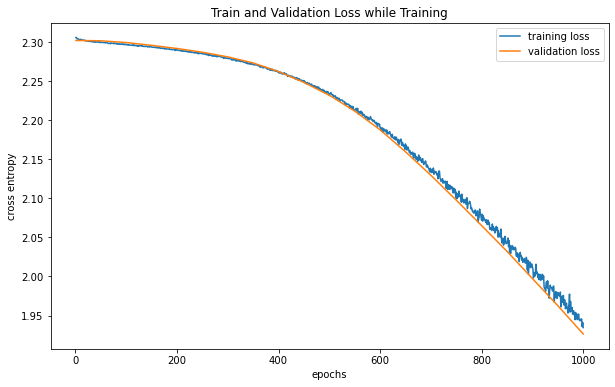

In [7]:
fl.plot_training_loss()

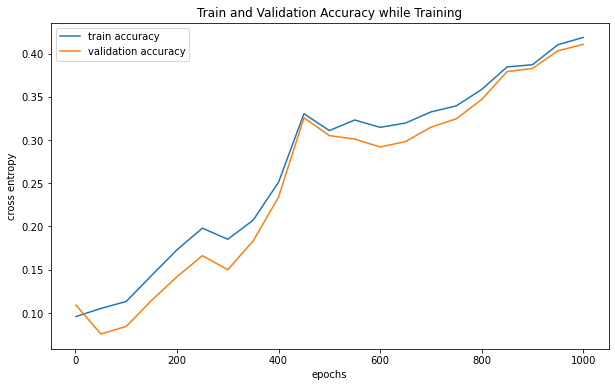

In [8]:
fl.plot_training_accuracy()

In [9]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.9384
                 precision    recall  f1-score   support

             AC       0.31      1.00      0.47      4650
    Dish washer       0.04      0.00      0.01      3700
Washing Machine       0.45      0.42      0.44      3600
          Dryer       0.48      0.31      0.38      3650
   Water heater       0.65      0.46      0.54      3750
             TV       0.80      0.28      0.41      3250
      Microwave       0.59      0.25      0.35      3500
         Kettle       0.12      0.01      0.01      3550
       Lighting       0.32      0.52      0.40      3300
   Refrigerator       0.66      0.88      0.75      3550

       accuracy                           0.43     36500
      macro avg       0.44      0.41      0.38     36500
   weighted avg       0.44      0.43      0.38     36500



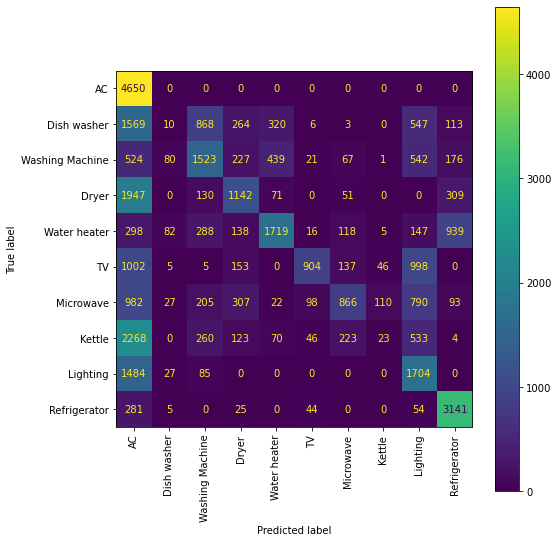

In [10]:
# TODO should this be accuracies? "The confusion matrix should present the classification accuracy for each appliance"
fl.plot_confusion_matrix(x_test, y_test)

## Run training with aggregated data

In [11]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [12]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3059, val loss: 2.3023, val acc: 0.1160
  Epoch: 50,  train loss: 2.2989, val loss: 2.3000, val acc: 0.1449
  Epoch: 100,  train loss: 2.2990, val loss: 2.2986, val acc: 0.1430
  Epoch: 150,  train loss: 2.2952, val loss: 2.2970, val acc: 0.0774
  Epoch: 200,  train loss: 2.2859, val loss: 2.2970, val acc: 0.0957
  Epoch: 250,  train loss: 2.2793, val loss: 2.2912, val acc: 0.1081
  Epoch: 300,  train loss: 2.2796, val loss: 2.2768, val acc: 0.1997
  Epoch: 350,  train loss: 2.2639, val loss: 2.2738, val acc: 0.1492
  Epoch: 400,  train loss: 2.2600, val loss: 2.2599, val acc: 0.2435
  Epoch: 450,  train loss: 2.2538, val loss: 2.2420, val acc: 0.2360
  Epoch: 500,  train loss: 2.2288, val loss: 2.2246, val acc: 0.2903
  Epoch: 550,  train loss: 2.1850, val loss: 2.2031, val acc: 0.2590
  Epoch: 600,  train loss: 2.1863, val loss: 2.1796, val acc: 0.2417
  Epoch: 650,  train loss: 2.1773, val loss: 2.1500, val acc: 0.2549
  Epoch: 700,  train loss: 2.1

### Analysis

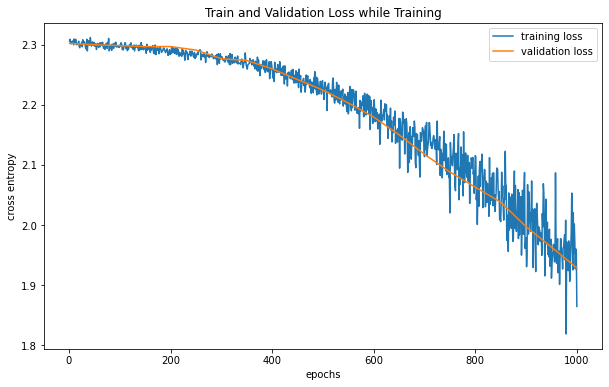

In [13]:
fl_agg.plot_training_loss()

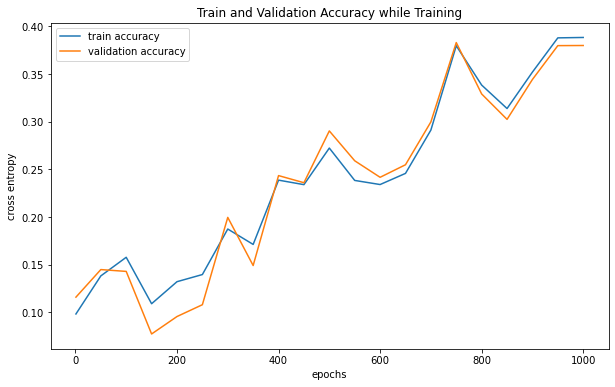

In [14]:
fl_agg.plot_training_accuracy()

In [15]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.9399
                 precision    recall  f1-score   support

             AC       0.30      1.00      0.46      4650
    Dish washer       0.05      0.01      0.01      3700
Washing Machine       0.47      0.39      0.43      3600
          Dryer       0.45      0.34      0.39      3650
   Water heater       0.51      0.54      0.52      3750
             TV       0.85      0.20      0.32      3250
      Microwave       0.61      0.22      0.32      3500
         Kettle       0.10      0.01      0.02      3550
       Lighting       0.33      0.50      0.40      3300
   Refrigerator       0.67      0.65      0.66      3550

       accuracy                           0.40     36500
      macro avg       0.43      0.39      0.35     36500
   weighted avg       0.42      0.40      0.36     36500



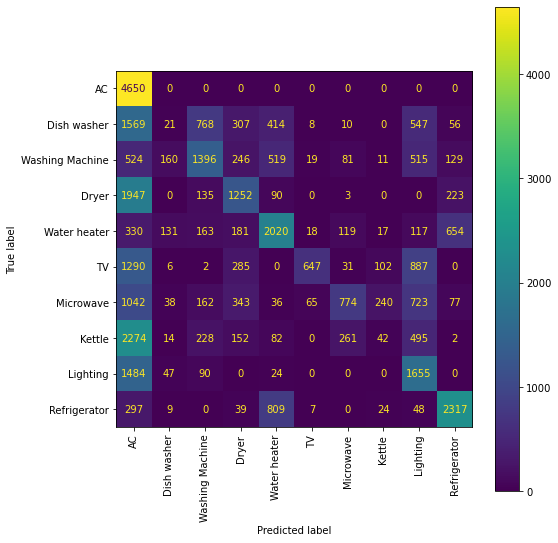

In [16]:
# TODO should this be accuracies? "The confusion matrix should present the classification accuracy for each appliance"
fl_agg.plot_confusion_matrix(x_test, y_test)